# <center> <font color = "blue" weight = "bold"> Segmentation RFM

<center> <img src=https://rfmcube.com/wp-content/uploads/2021/07/1_HiwX6vul8c4PBEueq3yBMw.png width="400" height="200">

Les clients d'une entreprise n'ont pas les mêmes besoins et ont des profils variés. L'entreprise doit donc adapter ses actions en fonction de cela. Pour y parvenir, il est indispensable de diviser la clientèle en des groupes présentant des caractéristiques similaires. Plusieurs méthodes de segmentation sont possibles à réaliser, mais pour ce notebook, nous allons réaliser uniquement la segmentation RFM. 

**RFM** signifie Récence - Fréquence - Valeur monétaire. <br>
Dans la première partie de ce projet, nous avons créé les segments ci-dessous :
- Bronze : Clients/achetreurs les moins actifs et générant des revenus très faibles ; 
- Silver : Clients générant des revenus modérés ; 
- gold : Clients générant des revenus importants ;
- Platinum : représente le groupe de clients à ne pas perdre. Car ce groupe génère les revenus les plus importants pour l'entreprise.

L'objectif à présent est d'appliquer un apprentissage automatique non supervisé pour identifier les clients faisant partir des différents groupes (clusters). Pour ce fait, nous allons réaliser La segmentation RFM en utilisant deux méthodes :
- RFM classique ;
- RFM avec l'algorithme K-means


A présent, passons au codage et réalisons notre segmentation RFM.

## <left> <font color = "blue" weight = "bold"> I. Importation des librairies et données

### <left> <font color = "blue" weight = "bold"> I.1. Importation des librairies et options

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
import plotly.graph_objects as go
import plotly.express as px
from sklearn.cluster import KMeans
from scipy import stats
from scipy.stats import kstest, skew
from sklearn.preprocessing import FunctionTransformer, RobustScaler

### <left> <font color = "blue" weight = "bold"> I.2. Importation des données

In [2]:
data_rfm = pd.read_csv("rfm.csv")

## <left> <font color = "blue" weight = "bold"> II. Vérification des données

In [3]:
data_rfm.head()

,customer_unique_id,recence,frequence,montant
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,536,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89


In [4]:
# Description des données
skim(data_rfm)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 91481  │ │ int32       │ 2     │                                                          │
│ │ Number of columns │ 4      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean    ┃ sd      ┃ p0   ┃ p25    ┃ p75    ┃ p100     ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ recence             │     0 │        0 │     240 │     150 │    0 │    110 │    340 │      690 │   ▇█▆▄▃   │  │
│ │ frequence           │     0 │        0 │     1.2 │    0.84 │    1 │      1 │      1 │       75 │     █     │  │
│ │ montant             │     0 │        0 │     170 │     260 │   10 │     64 │    190 │    14000 │     █     │  │
│ └─────────────────────┴───────┴──────────┴─────────┴─────────┴──────┴────────┴────────┴──────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA     ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ customer_unique_id                 │      0 │         0 │                         1 │                91000 │  │
│ └────────────────────────────────────┴────────┴───────────┴───────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

**_Observations :_** <br>
- Aucune valeur manquante ;
- Nous comptons 9.333 clients ;
- La fréquence des achats est très faible, en moyenne 1 achat par client pour un montant de dépenses moyen de 190 R$.
- Les variables numériques ne semblent pas suivre une distribution normale : regardons cela de plus près. 

**_Vérification des outliers_** <br>
Nous allons procéder par l'analyse des boîtes à moustache

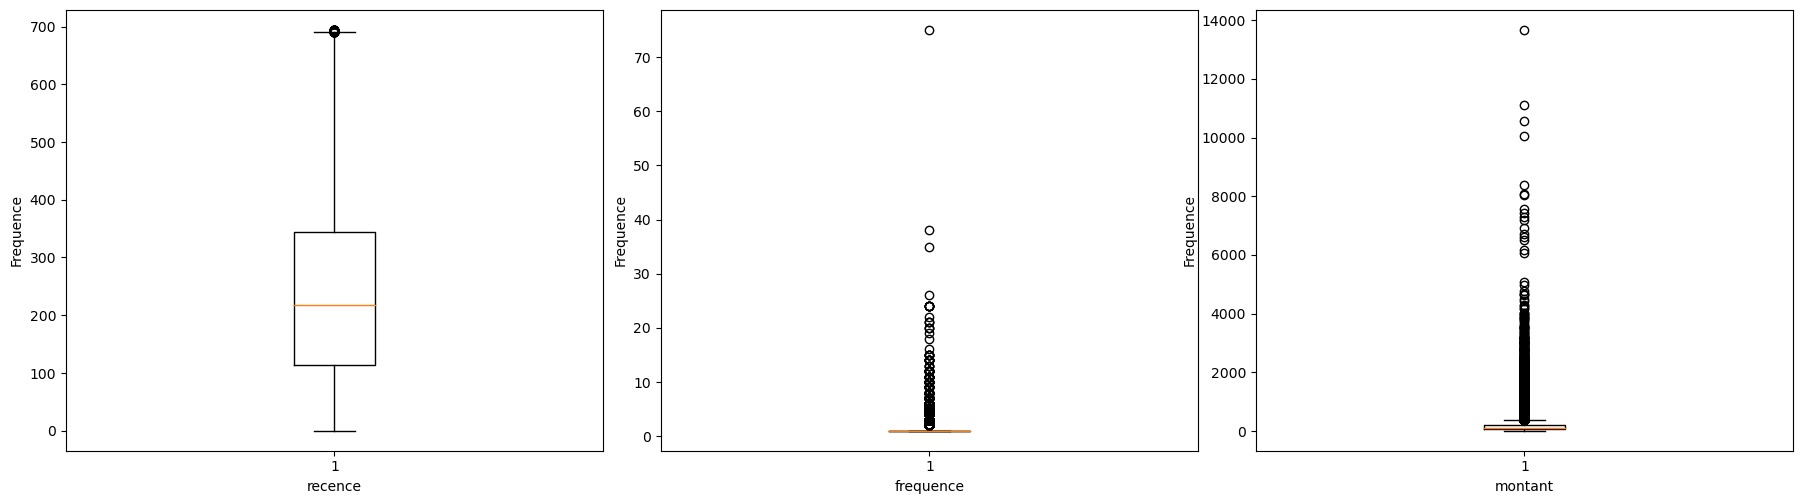

In [5]:
# Paramètres des tracés
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt.tight_layout()

# Définition des variables
variables = ["recence", "frequence", "montant"]

# Boucle pour afficher les boîtes à moustaches sur chaque axe
for i, var in enumerate(variables):
    axes[i].boxplot(data_rfm[var])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequence')

# Affichage de la figure
plt.show()


_Les variables "recence" et "montant" contiennent des valeurs qui s'éloignent fortement des autres, mais ne constituent pas des valeurs aberrantes, nous allons les garder telles qu'elles._ <br>
Définissons l'identifiant client comme index dans ce tableau de données.

In [6]:
# Création d'une copie du jeu de données
data = data_rfm.copy()

# Définition de "customer_unique_id" comme index
data = data.set_index("customer_unique_id")

# Visualisation
data.head(3)

,recence,frequence,montant
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
0000f46a3911fa3c0805444483337064,536,1,86.22


_Procédons à présent à la segmentation RFM classique_

## <font color = "blue" weight = "bold"> III. Segmentation RFM "classique"

La segmentation RFM catégorise les clients en différents segments, en fonction de leurs interactions avec le site web, dans cette section,  nous allons effectuer une segmentation RFM basée sur le score RFM combinant les trois paramètres "recence", "frequence" et "montant" ce qui permettra de diviser les clients en 11 groupes différents.

### <font color = "blue" weight = "bold"> III.1. Calcul du score RFM
    
Pour calculer le score RFM, nous allons discrétiser les variables "recence", "frequence" et "montant" en utilisant la méthode de découpage en quantiles (quantile-based discretization). Chaque valeur sera attribuée à l'intervalle correspondant, et le score correspondant sera stocké dans une nouvelle variable.

In [7]:
data["score_recence"]  = pd.qcut(data['recence'], 5, labels=[5, 4, 3, 2, 1])
data["score_frequence"]= pd.qcut(data['frequence'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
data["score_montant"] = pd.qcut(data['montant'], 5, labels=[1, 2, 3, 4, 5])

**_Fusion des scores_**

In [8]:
data["score"] = data.score_recence.astype(str) + data.score_frequence.astype(str) + data.score_montant.astype(str)
data.head()

,recence,frequence,montant,score_recence,score_frequence,score_montant,score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,4,414
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,1,411
0000f46a3911fa3c0805444483337064,536,1,86.22,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,1,4,214


### <font color = "blue" weight = "bold"> III.2. Création des groupes
 
Nous allons à présent repartir les clients en différents groupes. Comme référence, nous nous servirons du tableau de répartition des clients proposé par "Bloomreach" et disponible depuis le site web ci-dessous. <br> https://documentation.bloomreach.com/engagement/docs/rfm-segmentation

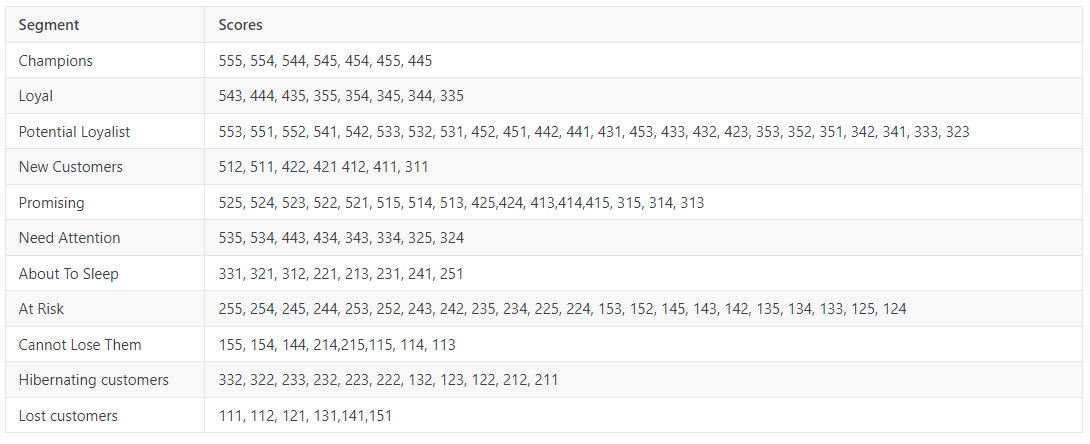

In [9]:
# Création d'un disctionnaire contenant les valeurs issus du tableau ci-dessus
dico = {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers', 
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

In [10]:
# Création d'une nouvelle colonne "groupe"
data["groupe"] = data.score_recence.astype(str) + data.score_frequence.astype(str) + data.score_montant.astype(str)

# Remplacer les valeurs de la colonne groupe par les valeurs du dictionnaire créé ci-dessus
data["groupe"] = data["groupe"].replace(dico, regex = True)

# Visualisation des transformations
data.head(10)

,recence,frequence,montant,score_recence,score_frequence,score_montant,score,groupe
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4,1,4,414,Promising
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4,1,1,411,New Customers
0000f46a3911fa3c0805444483337064,536,1,86.22,1,1,2,112,Lost customers
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2,1,1,211,Hibernating customers
0004aac84e0df4da2b147fca70cf8255,287,1,196.89,2,1,4,214,Cannot Lose Them
0004bd2a26a76fe21f786e4fbd80607f,145,1,166.98,4,1,4,414,Promising
00050ab1314c0e55a6ca13cf7181fecf,131,1,35.38,4,1,1,411,New Customers
00053a61a98854899e70ed204dd4bafe,182,2,419.18,3,5,5,355,Loyal
0005e1862207bf6ccc02e4228effd9a0,542,1,150.12,1,1,4,114,Cannot Lose Them


### <font color = "blue" weight = "bold"> III.3. Analyse des groupes

**_Regroupons les données par groupe et calculons les statistiques descriptives_**

In [11]:
data["groupe"].unique()

array(['Promising', 'New Customers', 'Lost customers',
       'Hibernating customers', 'Cannot Lose Them', 'Loyal',
       'About To Sleep', 'At Risk', 'Champions', 'Potential Loyalist',
       'Need Attention'], dtype=object)

In [12]:
# Regrouper les données par groupes
data_stat = data[["recence", "frequence", "montant", "groupe"]].groupby("groupe").agg(["mean", "median","min", "max", "count"])

# Calcul du ratio de client par groupe
data_stat['Ratio']= round((100*data_stat['recence']["count"]/data_stat['recence']["count"].sum()), 2)

data_stat.style.background_gradient(cmap = "vlag")

_Visualisation graphique de la répartition des clients par groupe_

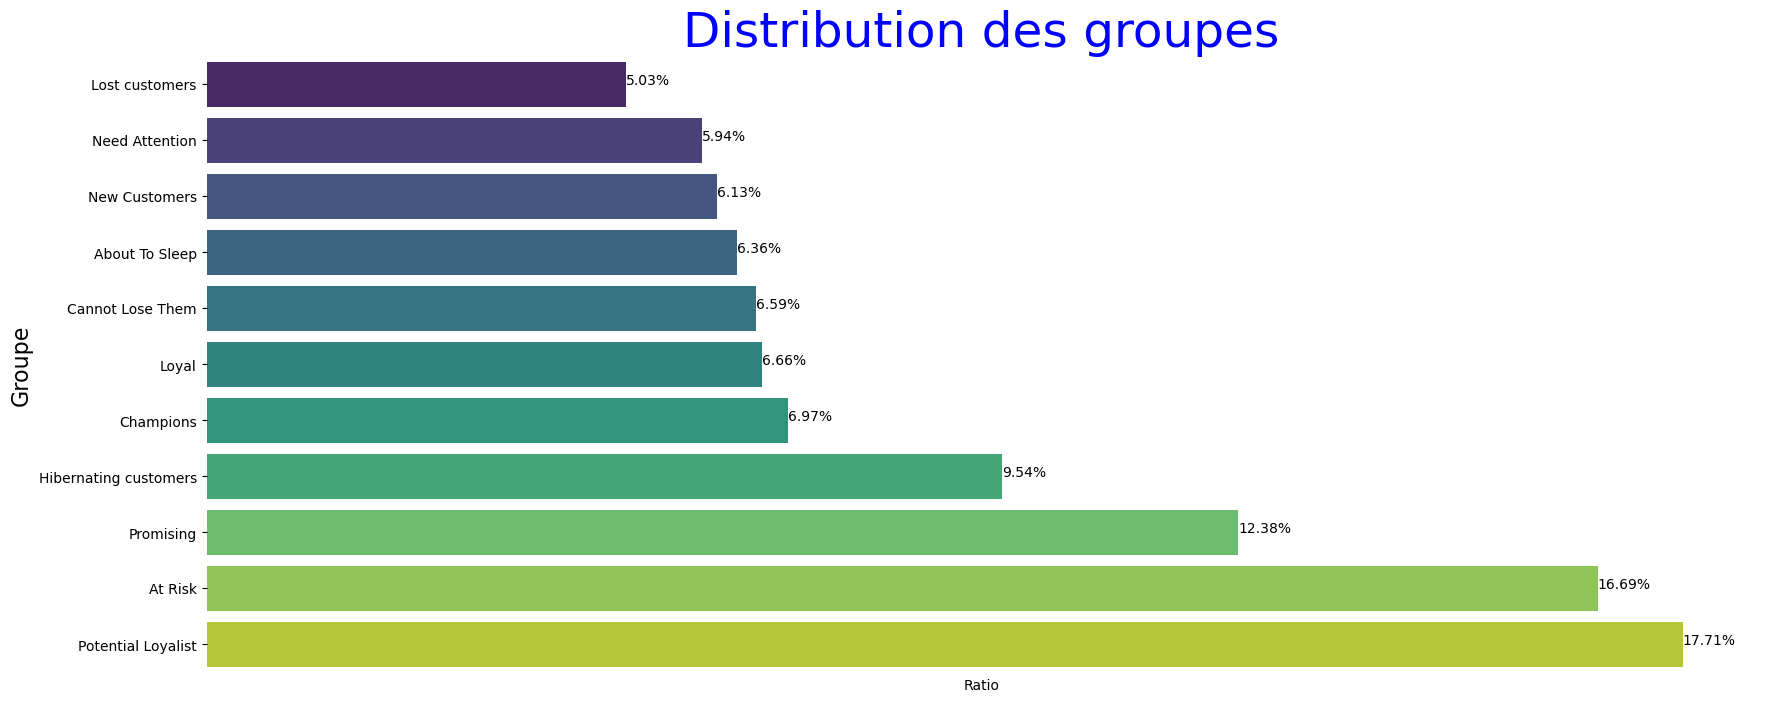

In [13]:
# Création de la figure et ajustement de la taille
plt.figure(figsize=(20, 8))

# Tri des valeurs par ordre croissant
data_stat_sorted = data_stat.sort_values(by='Ratio')

# Tracé du graphique en utilisant un barplot vertical
per = sns.barplot(x=data_stat_sorted['Ratio'], y=data_stat_sorted.index, data=data_stat_sorted, palette="viridis")

# Suppression des axes inutiles
sns.despine(bottom=True, left=True)

# Ajout des étiquettes pour chaque barre
for i, v in enumerate(data_stat_sorted['Ratio']):
    per.text(v, i, "{:.2f}".format(v) + "%", color='black', ha="left")

# Définition du label de l'axe des ordonnées
per.set_ylabel('Groupe', fontsize=16)

# Suppression des ticks de l'axe des abscisses
per.set(xticks=[])

# Titre du graphique
plt.title('Distribution des groupes', fontsize=35, color = "blue")

# Affichage du graphique
plt.show()

**_Visualisation interactive du treemap_** 

In [14]:
import plotly.graph_objects as go
import plotly.io as pio

# Création des données pour le treemap
sizes = data_stat["recence"]["count"]
labels = data_stat.index
colors = ["red", "orange", "blue", "forestgreen", "yellow", "purple", "cornsilk", "royalblue", "pink", "brown"]

# Création de la figure avec Plotly
fig = go.Figure(go.Treemap(
    labels=labels,
    parents=[""] * len(labels),
    values=sizes,
    marker=dict(
        colors=colors,
    ),
))

# Configuration du layout
fig.update_layout(
    title="Matrix RFM",
    font=dict(size=15),
    width=800,
    height=500,
)

# Affichage du graphique
pio.show(fig)

## <font color = "blue" weight = "bold"> IV. Segmentation RFM avec l'algorithme K-means

### <font color = "blue" weight = "bold"> IV.1. Vérification de la distribution des variables

**_Vérification de la distribution des variables :_** <br> L'algorithme k-means est sensible aux variables asymétriques, car il est basé sur la distance euclidienne pour regrouper les données. La distance euclidienne suppose que les variables ont une distribution symétrique et que les écarts entre les valeurs sont équivalents dans toutes les directions.<br> Vérifier l'asymétrie de nos variables permettra de savoir s'il faut normaliser nos valeurs avant de les standardiser. <br> Voici comment nous interprèterons l'asymétrie de nos variables :
- La valeur d'asymétrie supérieure à 1 ou inférieure à -1 indique une distribution fortement asymétrique ;
- La valeur comprise entre 0,5 et 1 ou -0,5 et -1 est modérément asymétrique ;
- La valeur comprise entre -0,5 et 0,5 indique que la distribution est assez symétrique.

Ainsi, les variables ayant une asymétrie comprise entre -0,5 et 0,5 ne seront pas normalisées.
Référence : https://docs.oracle.com/cd/E57185_01/CBREG/ch03s02s03s01.html#:~:text=A%20skewness%20value%20greater%20than,the%20distribution%20is%20fairly%20symmetrical

In [15]:
# Définition d'une fonction pour visualiser les distributions

def plot_distribution_and_normality(data, figsize=(15, 3)):
    # Créer une figure et trois sous-graphiques disposés en une ligne et trois colonnes
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)

    # Sélection des variables numériques
    numerique = data.select_dtypes(include="number")

    # Définition d'une boucle pour afficher la distribution de chaque variable numérique et effectuer le test de normalité
    for i, var in enumerate(numerique):
        # Affichage de l'histogramme et du graphique de densité
        sns.histplot(data[var], ax=axes[i], kde=True)
        plt.tight_layout()

        # Test de normalité (Kolmogorov-Smirnov)
        stat, p_value = kstest(data[var], 'norm')

        # Calcul de l'asymétrie
        asymetrie = skew(data[var])

        # Affichage des résultats du test de normalité et de l'asymétrie
        print(f"Variable {var}:")
        print(f"   - Statistique de test : {stat}")
        print(f"   - Valeur p : {p_value}")
        if p_value > 0.05:
            print("   - La distribution semble normale (hypothèse non rejetée).")
        else:
            print("   - La distribution ne semble pas être normale (hypothèse rejetée).")
        print(f"   - Asymétrie : {asymetrie}")
        print("\n")

Variable recence:
   - Statistique de test : 0.9975415953381125
   - Valeur p : 0.0
   - La distribution ne semble pas être normale (hypothèse rejetée).
   - Asymétrie : 0.45125638183815897


Variable frequence:
   - Statistique de test : 0.8413447460685429
   - Valeur p : 0.0
   - La distribution ne semble pas être normale (hypothèse rejetée).
   - Asymétrie : 15.911724712745318


Variable montant:
   - Statistique de test : 1.0
   - Valeur p : 0.0
   - La distribution ne semble pas être normale (hypothèse rejetée).
   - Asymétrie : 11.170766789565196




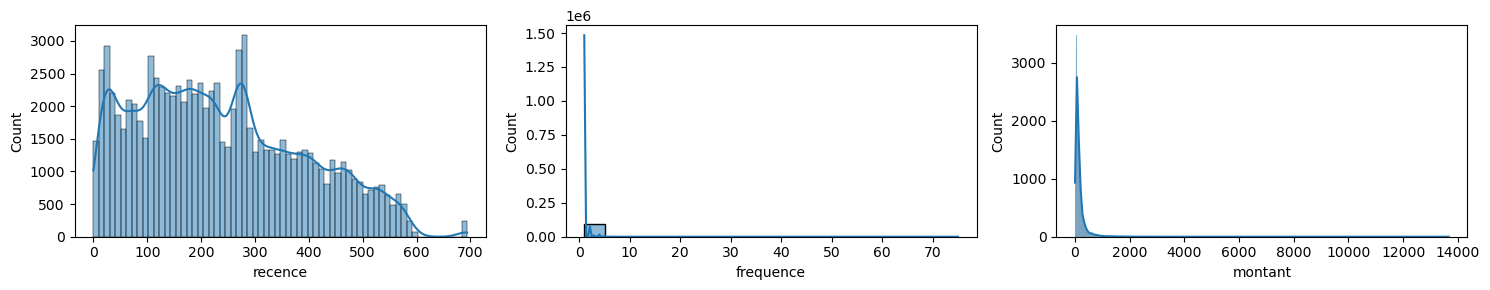

In [16]:
plot_distribution_and_normality(data_rfm)

_Aucune des distributions n'est symétrique, il va donc falloir standardiser les données. Cependant, l'asymétrie des variables "frequencee et "montant" sont forte (skew > 1), il va donc falloir les normaliser._

**_Normalisation par transformation logarithmique_**

In [17]:
# Création d'une copie du jeu de données data_RFM
rfm_normalized = data_rfm.copy()

# Sélection des colonnes à normaliser
columns_to_normalize = ["frequence", "montant"]

# Extraction des colonnes sélectionnées
data_subset = rfm_normalized[columns_to_normalize]

# Normalisation des colonnes sélectionnées
transformer = FunctionTransformer(np.log1p)
normalized_data = transformer.transform(data_subset)

# Création d'un DataFrame avec les colonnes normalisées
normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)

# Réinsertion des colonnes normalisées dans le DataFrame d'origine
rfm_normalized[columns_to_normalize] = normalized_df

# Visualiser les 3 premières lignes
rfm_normalized.head(3)

,customer_unique_id,recence,frequence,montant
0,0000366f3b9a7992bf8c76cfdf3221e2,111,0.693147,4.962145
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,0.693147,3.338967
2,0000f46a3911fa3c0805444483337064,536,0.693147,4.468434


**_Visualisation de l'impact de la transformation logarithmique_**

Variable recence:
   - Statistique de test : 0.9975415953381125
   - Valeur p : 0.0
   - La distribution ne semble pas être normale (hypothèse rejetée).
   - Asymétrie : 0.45125638183815897


Variable frequence:
   - Statistique de test : 0.7558914042144173
   - Valeur p : 0.0
   - La distribution ne semble pas être normale (hypothèse rejetée).
   - Asymétrie : 3.4637137870424084


Variable montant:
   - Statistique de test : 0.9971043901023421
   - Valeur p : 0.0
   - La distribution ne semble pas être normale (hypothèse rejetée).
   - Asymétrie : 0.5563912686256868




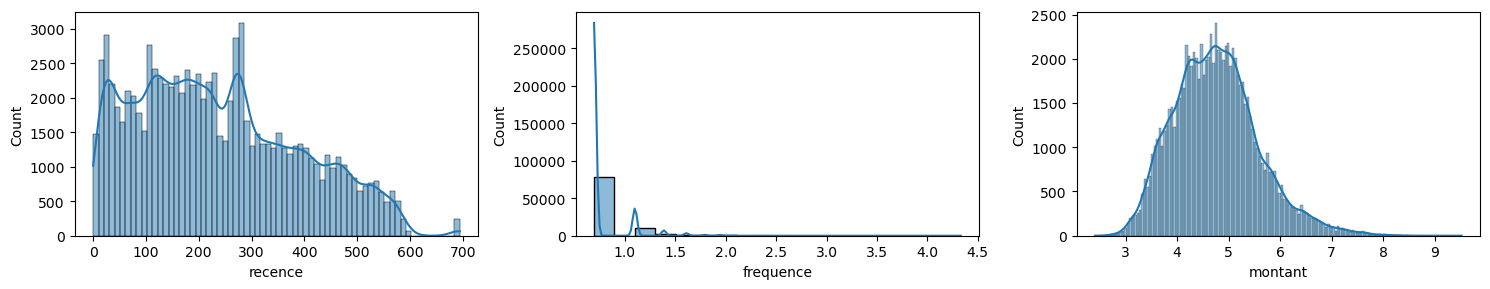

In [18]:
plot_distribution_and_normality(rfm_normalized)

_La transformation logarithmique n'a pas permis de sortir des limites "d'asymétrie forte" (les skew sont toujours > 0,5).Nous allons utiliser la méthode de **Box-Cox** pour réaliser cette tâche._

In [19]:
# Sélection des variables à normaliser
variables_a_normaliser = ["recence", "frequence", "montant"]

# Copie du jeu de données avec les variables sélectionnées
data_normalised = data_rfm.copy()

# Parcourir les variables à normaliser
for variable in variables_a_normaliser:
    # Vérifier si la variable ne contient pas de valeurs négatives ou nulles
    if np.min(data_normalised[variable]) > 0:
        # Appliquer la transformation Box-Cox
        data_normalised[variable], _ = stats.boxcox(data_normalised[variable])

data_normalised.head(3)

,customer_unique_id,recence,frequence,montant
0,0000366f3b9a7992bf8c76cfdf3221e2,111,0.0,3.097686
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,0.0,2.391878
2,0000f46a3911fa3c0805444483337064,536,0.0,2.909676


Variable recence:
   - Statistique de test : 0.9975415953381125
   - Valeur p : 0.0
   - La distribution ne semble pas être normale (hypothèse rejetée).
   - Asymétrie : 0.45125638183815897


Variable frequence:
   - Statistique de test : 0.5
   - Valeur p : 0.0
   - La distribution ne semble pas être normale (hypothèse rejetée).
   - Asymétrie : 1.958759022853187


Variable montant:
   - Statistique de test : 0.9839110729098115
   - Valeur p : 0.0
   - La distribution ne semble pas être normale (hypothèse rejetée).
   - Asymétrie : 0.006831443353637689




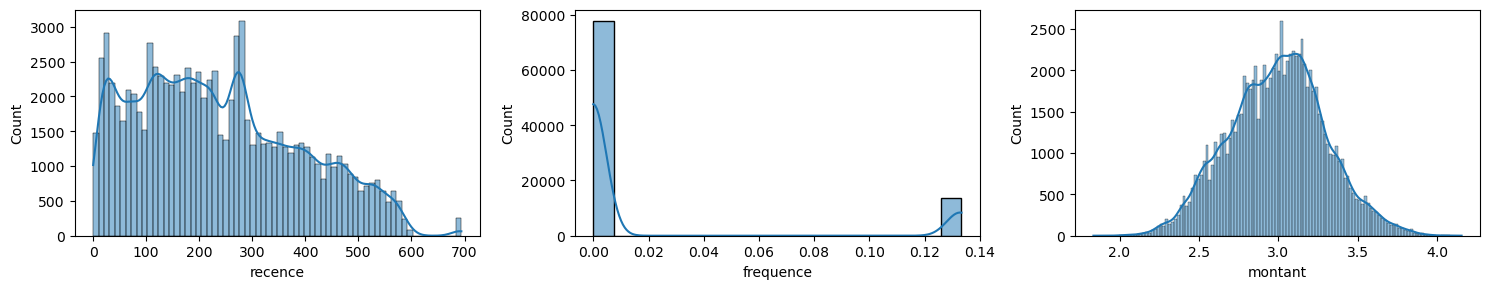

In [20]:
plot_distribution_and_normality(data_normalised)

Le résultat obtenu avec la méthode Box-Cox est meilleur qu'avec la transformation logarithmique.

### <font color = "blue" weight = "bold"> IV.2. Preprocessing

**_Standardisation des variables_**

In [21]:
# Selection des variables à standardiser
variables = data_normalised[["recence", "frequence", "montant"]]

# Standardisation
scale = RobustScaler()
features_scaled = scale.fit_transform(variables)
features_scaled = pd.DataFrame(features_scaled, columns = variables.columns)
features_scaled.head()

,recence,frequence,montant
0,-0.458874,0.0,0.227647
1,-0.445887,0.0,-1.498474
2,1.380952,0.0,-0.232150
3,0.445887,0.0,-0.942995
4,0.303030,0.0,0.505061


**_Recherche du nombre optimal de cluster_**

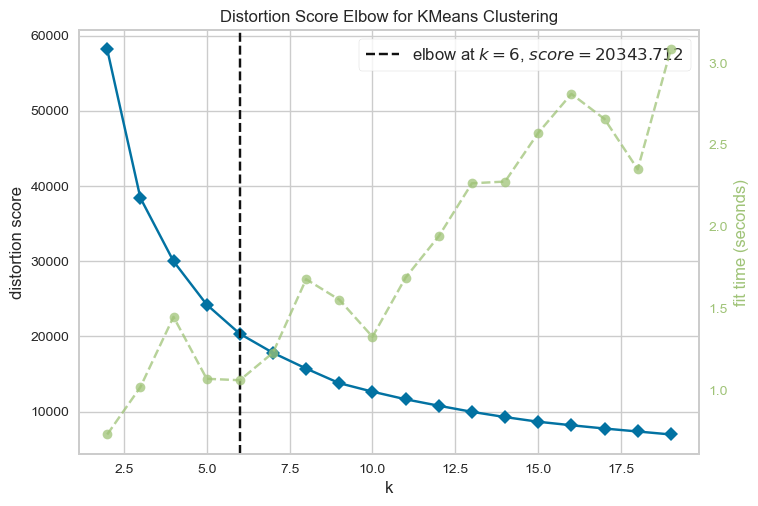

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
from yellowbrick.cluster import KElbowVisualizer
k_means = KMeans(n_init = 10, random_state = 50)
elbow = KElbowVisualizer(k_means, k=(2, 20))
elbow.fit(features_scaled)
elbow.show()

Le nombre optimal de cluster est 6. Nous allons donc segmenter les clients en 6 groupes.

### <font color = "blue" weight = "bold"> IV.3. Segmentation

In [23]:
kmeans= KMeans(n_clusters = elbow.elbow_value_, n_init = 10, random_state = 1000)
kmeans.fit(features_scaled)

KMeans(n_clusters=6, n_init=10, random_state=1000)

**_Aperçu de la segmentation_**

In [24]:
features_scaled["segment"] = kmeans.labels_
features_scaled.head()

,recence,frequence,montant,segment
0,-0.458874,0.0,0.227647,4
1,-0.445887,0.0,-1.498474,0
2,1.380952,0.0,-0.232150,2
3,0.445887,0.0,-0.942995,2
4,0.303030,0.0,0.505061,1


In [25]:
# Attributions des identifiants clients au cluster correspondant
rfm_cluster = data_rfm.copy()
rfm_cluster["segment"] = kmeans.labels_
rfm_cluster

,customer_unique_id,recence,frequence,montant,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,0
2,0000f46a3911fa3c0805444483337064,536,1,86.22,2
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,2
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,1
...,...,...,...,...,...
91476,fffcf5a5ff07b0908bd4e2dbc735a684,446,2,2067.42,3
91477,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,1
91478,ffff371b4d645b6ecea244b27531430a,567,1,112.46,3
91479,ffff5962728ec6157033ef9805bacc48,118,1,133.69,4


**_Analyse des clusters_**

In [26]:
 segmentation = rfm_cluster.groupby(['segment']).agg({'recence'  : ['mean','median', 'min', 'max'],
                                                     'frequence': ['mean','median', 'min', 'max'],
                                                     'montant' : ['mean','median', 'min', 'max', 'count']
                                                    }).round(0)
segmentation.style.background_gradient(cmap='vlag')

**_Observations :_** <br> 
- La plupart des clients n'ont pas passé de commande depuis un long moment. 
- La plupart des clients n'ont passé qu'une seule commande.

**_Répartition des clients par groupe_**

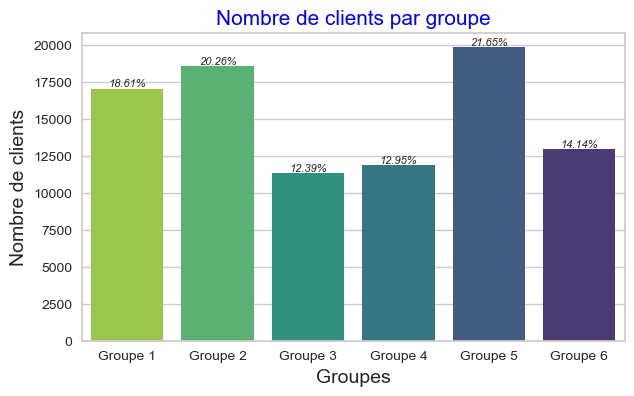

In [27]:
# Dimmension de la figure
plt.figure(figsize = ((7, 4)))

# Calcul du pourcentage des clients par classe
pourcentage = rfm_cluster["segment"].value_counts() / len(rfm_cluster) * 100

# Tracer du diagramme en barre
ax = sns.countplot(data=rfm_cluster, x = rfm_cluster['segment'].sort_values(), palette='viridis_r')

# Ajouter les pourcentages sur les barres
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f'{pourcentage[i]:.2f}%', 
                (p.get_x() + p.get_width() / 2., 
                 height), ha='center', va='bottom',
               fontsize = 8, fontstyle = "italic")

# Parametrage des axes
plt.xlabel('Groupes', fontsize = 14)
plt.ylabel('Nombre de clients', fontsize = 14)
plt.xticks([0, 1, 2, 3, 4, 5], ['Groupe 1', 'Groupe 2', 'Groupe 3', 'Groupe 4', 'Groupe 5', 'Groupe 6'], rotation = 0)

# Titre
plt.title('Nombre de clients par groupe', fontsize = 15, color = "blue")

# Afficher le diagramme en barre
plt.show()

**_Quelle groupe dépense le plus ?_**

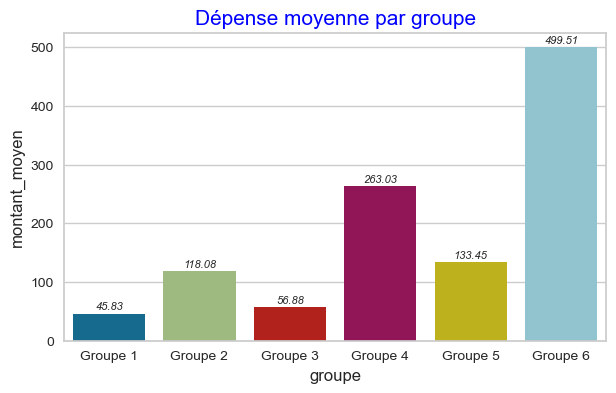

In [28]:
# Dimension de la figure
plt.figure(figsize=(7, 4))

# Regrouper les données par cluster et calculer la moyenne des dépenses
depense_moyenne = rfm_cluster.groupby("segment").agg({"montant": "mean"}).reset_index()

# Renommer les colonnes
depense_moyenne.columns = ["groupe", "montant_moyen"]

# Paramètre x et y du tracé
x = depense_moyenne["groupe"]
y = depense_moyenne["montant_moyen"]

# Tracé du diagramme 
ax = sns.barplot(data=depense_moyenne, x=x, y=y)

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".2f"), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), 
                textcoords='offset points', fontsize = 8, fontstyle = "italic")

# Titre
plt.xticks([0, 1, 2, 3, 4, 5], ['Groupe 1', 'Groupe 2', 'Groupe 3', 'Groupe 4', 'Groupe 5', 'Groupe 6'], rotation = 0)
plt.title('Dépense moyenne par groupe', fontsize=15, color="blue")

# Afficher le diagramme en barre
plt.show()

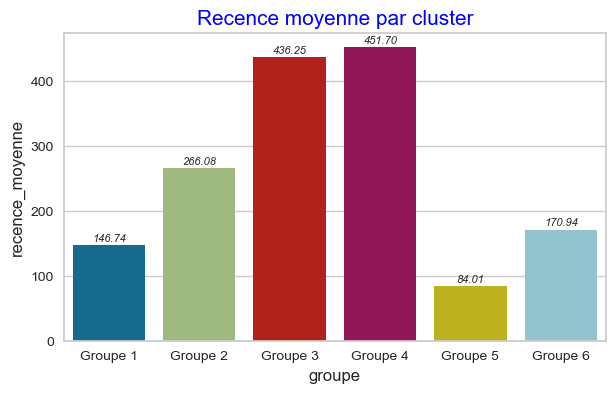

In [29]:
# Dimension de la figure
plt.figure(figsize = ((7, 4)))

# Regrouper les données par cluster et calculer la moyyene des dépenses
recence_moyenne = rfm_cluster.groupby("segment").agg({"recence" : "mean"}).reset_index()

# Renommer les colonnes
recence_moyenne.columns = ["groupe", "recence_moyenne"]

# Paramètre x et y du tracé
x = recence_moyenne["groupe"]
y = recence_moyenne["recence_moyenne"]

# Tracé du diagramme 
ax = sns.barplot(data = recence_moyenne, x = x, y = y)

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".2f"), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), 
                textcoords='offset points', fontsize = 8, fontstyle = "italic")

# Titre
plt.title('Recence moyenne par cluster', fontsize = 15, color = "blue")
plt.xticks([0, 1, 2, 3, 4, 5], ['Groupe 1', 'Groupe 2', 'Groupe 3', 'Groupe 4', 'Groupe 5', 'Groupe 6'], rotation = 0)

# Afficher le diagramme en barre
plt.show()

**_Conclusion_**
* Les fréquences d'achat sont très faible dans tous les groupes (en moyenne 1 achat par client). Ceci signifie que l'entreprise à du mal à fidéliser sa clientèle;

* Groupe 1 : Clients relativement anciens, ayant dépensé très peu : en moyen 46 R$ ;

* Groupe 2 : Cluster important en terme d'effectif, 20% des clients totaux. Clients anciens au pouvoir d'achat modéré ;

* Groupe 3 : On retrouve dans ce groupe, 13% des clients. Il s'agit des clients les plus anciens (avec ceux du groupe 4) avec un faible pouvoir d'achat ;

* Groupe 4 : Clients anciens avec un fort pouvoir d'achat : panier moyen égal à 263 R$. Ce groupe compte 13% des clients de market-place ;

* Groupe 5 : Ce groupe renferme les nouveaux clients au pouvoir d'achat moyen. C'est aussi le groupe le plus important en terme d'effectif avec environ 27% des clients.

* Groupe 6 : On pourrait considérer les clients de ce groupe comme les plus fidèles et les plus rentables. En effet, contrairement aux autres groupes, ces clients ont une fréquence d'achat moyenne égal à 2, et le montant moyen de leurs paniers est de 500 R$. Ce groupe ne compte que 14% des clients, mais des clients précieux.